# Speed Dating Data Analysis (Using Imblearn)


# Part 0: Setup Google Drive Environment / Data Collection

In [ ]:
# install pydrive to load data
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# https://docs.google.com/spreadsheets/d/1SZddhHzdrSeaZD0wP4-96SQYOAFtQUfX/edit?usp=sharing&ouid=117953154631179589875&rtpof=true&sd=true
id = "1SZddhHzdrSeaZD0wP4-96SQYOAFtQUfX"
file = drive.CreateFile({'id':id}) 
file.GetContentFile('speed_dating.xlsx')

# Part 1: Data Exploration

### Part 1.1: Understand the Raw Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_excel('speed_dating.xlsx')
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1.0,1.0,0.0,1.0,1.0,1.0,10.0,7.0,NaN,4.0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,0.0,1.0,1.0,1.0,10.0,7.0,NaN,3.0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,0.0,1.0,1.0,1.0,10.0,7.0,NaN,10.0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,0.0,1.0,1.0,1.0,10.0,7.0,NaN,5.0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,0.0,1.0,1.0,1.0,10.0,7.0,NaN,7.0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(191), object(4)
memory usage: 12.5+ MB


In [ ]:
# check the unique values for each column
df.nunique()

iid         551
id           22
gender        2
idg          44
condtn        2
           ... 
attr5_3       9
sinc5_3       9
intel5_3      7
fun5_3       10
amb5_3        9
Length: 195, dtype: int64

### Part 1.2:  Understand the features

In [ ]:
# check missing values
df.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

# Part 2: Data Preprocessing

## Part 2.1: Data cleaning

In [ ]:
# Choose feature base on domain knowledge 
XY = df[['match', 'gender', 'round', 'position', 'order', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1']]

In [ ]:
XY.head()

,match,gender,round,position,order,int_corr,samerace,age_o,race_o,pf_o_att,...,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1
0,0.0,0.0,10.0,7.0,4.0,0.14,0.0,27.0,2.0,35.0,...,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,10.0,7.0,3.0,0.54,0.0,22.0,2.0,60.0,...,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1.0,0.0,10.0,7.0,10.0,0.16,1.0,22.0,4.0,19.0,...,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1.0,0.0,10.0,7.0,5.0,0.61,0.0,23.0,2.0,30.0,...,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1.0,0.0,10.0,7.0,7.0,0.21,0.0,24.0,3.0,30.0,...,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# drop columns with too much null numbers
XYdrop = XY.drop(['field','expnum', 'undergra', 'income', 'mn_sat', 'tuition', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1','zipcode', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr4_1'], axis=1)
XYdrop.shape[0]

8378

In [ ]:
# drop rows with null numbers
XYdrop_nonull = XYdrop.dropna()
XYdrop_nonull.reset_index(inplace=True, drop=True)
XYdrop_nonull.shape[0]
# XYdrop_nonull.shape[1]

8024

## Part 2.2: Stemming

In [ ]:
XYdrop_nonull['from'].unique()
XYdrop_nonull['from'].nunique()

266

In [ ]:
# Use nltk's English stopwords.
stopwords = nltk.corpus.stopwords.words('english') #stopwords.append("n't")
stopwords.append("yrs")
stopwords.append(" ")
stopwords.append("P")
stopwords.append("R")
stopwords.append(".")

print ("We use " + str(len(stopwords)) + " stop-words from nltk library.")
print (stopwords[:10])
#XY['from'].unique()

We use 184 stop-words from nltk library.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [ ]:
from nltk.stem.snowball import SnowballStemmer
# from nltk.stem import WordNetLemmatizer 

stemmer = SnowballStemmer("english")

# tokenization and stemming
def tokenization_and_stemming(text):
    tokens = []
    # exclude stop words and tokenize the document, generate a list of string 
    for word in nltk.word_tokenize(text):
        if word.lower() not in stopwords:
            tokens.append(word.lower())

    filtered_tokens = []
    
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if token.isalpha():
            filtered_tokens.append(token)
            
    # stemming
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [ ]:
XYdrop_nonull['from'][90:100] = "california"

for i in range(XYdrop_nonull.shape[0]):
  XYdrop_nonull['from'][i] = ''.join(tokenization_and_stemming(XYdrop_nonull['from'][i]))

<ipython-input-14-3c62503db0fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XYdrop_nonull['from'][90:100] = "california"
/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:1105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._set_values(indexer, value)
<ipython-input-14-3c62503db0fe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XYdrop_nonull['from'][i] = ''.join(tokenization_and_stemming(XYdrop_nonull['fro

In [ ]:
tokenization_and_stemming("I am from NYC")

['nyc']

In [ ]:
XYdrop_nonull['from'].unique()
XYdrop_nonull['from'].nunique()

228

In [ ]:
places = { 
       'chicago':'illinois', 
       #'alabama':, 
       #'connecticut':, 
       'texa':'texas', 
       'bowdoincolleg': "maine",
       'md':'maryland',
       'southerncalifornia':'california', 
       'londonengland':'england', 
       'palmspringcalifornia':'california',
       #'california':, 
       #'argentina':, 
       #'england':, 
       'cincinnatiohio':'ohio', 
       'miami':'florida',
       'milanitali':'italy', 
       'georgiausa':'georgia', 
       #'newyork':, 
       #'washingtondc':, 
       #'newjersey':,
       'annarbormi':'dontknow', 
       'hongkong':'china', 
       #'iowa':, 
       'westchestny':'newyork', 
       'boston':'massachusetts',
       #'michigan':, 
       'singapor':'singapore', 
       #'brazil':, 
       'brandeiunivers':'massachusetts', 
       'cincinnatioh':'ohio',
       'losangel':'california', 
       #'china':, 
       'sanfranciscohomeangelundergrad':'california', 
       #'spain':,
       #'israel':, 
       #'switzerland':, 
       'itali':'italy', 
       'philadelphia':'pennsylvania', 
       'houston':'texas',
       'brooklyn':'newyork', 
       #'florida':, 
       'tuscaloosaalabama':'alabama', 
       'albuquerqunm':'newmexico',
       'paloaltocalifornia':'california', 
       #'mexico':, 
       'torrancca':'california', 
       'louimo':'dontknow', 
       'londonuk':'london',
       #'minnesota': 
       #'ohio':, 
       '':'dontknow', 
       'washingtonstate':'washington', 
       #'panama':, 
       #'arizona':,
       'minneapolimn':'minnesota', 
       'nj':'newjersey',
       'sanfrancisco':'california', 
       #'bangladesh':,
       'longisland':'newyork', 
       'brooklynny':'newyork', 
       #'india':, 
       #'canada':, 
       #'colorado':,
       'annarbor':'michigan', 
       'philippin':'phillippines', 
       'milwaukewisconsin':'wisconsin', 
       'franc':'france',
       'longislandny':'newyork', 
       #'puertorico':, 
       'memphitn':'tennessee', 
       #'louisiana':, 
       #'maryland':,
       'statenisland':'newyork', 
       'newyorkny':'newyork', 
       'massachusett':'massachusetts', 
       'pougkeepsiny':'newyork',
       'sofiabg':'bulgaria', 
       'greenwichct':'conneticut', 
       #'taiwan':, 
       'europ':'dontknow', 
       #'colombia':, 
       #'albania':,
       'pa':'pennsylvania', 
       'cherrihillnj':'newyork', 
       'minneapoli':'minnesota', 
       'nyc':'newyork', 
       'ottawacanada':'canada',
       'philadelphiapa':'pennsylvania', 
       'atlantaga':'georgia', 
       'cleveland':'ohio', 
       'nycstatenisland':'newyork',
       'greec':'greece', 
       #'northcarolina':, 
       'statecollegpa':'pennsylvania', 
       'detroit':'michigan',
       'washingtondcmetroregion':'washingtondc', 
       'berkeleyca':'california', 
       'buffalony':'newyork',
       #'pennsylvania':, 
       'sandiegoca':'california', 
       #'uzbekistan':, 
       #'nebraska':, 
       'queen':'newyork',
       'kansa':'kansas', 
       'atlanta':'georgia', 
       #'uruguay':, 
       #'azerbaijan':, 
       'losangelca':'california',
       'newyorkciti':'newyork', 
       'rochestny':'newyork', 
       'taipeitaiwan':'taiwan', 
       'berkeley':'california',
       'northerncalifornia':'california', 
       'silverspringmd':'maryland', 
       #'vestal':, 
       'texaboston':'dontknow',
       #'cameroon':, 
       #'bulgaria':, 
       'newyorknewjersey':'newyork', 
       'baltimor':'maryland', 
       'dc':'washingtondc',
       'germani':'germany', 
       'washdc':'washingtondc', 
       #'sweden':, 
       'pittsburgh':'pennsylvania', 
       'detroitmichiganusa':'michigan',
       #'morgan':, 
       #'virginia':, 
       #'indiana':, 
       #'wisconsin':,
       'bornmontanaraissouthjerseynrphiladelphia':'dontknow', 
       'portlandoregon':'oregon',
       'seattl':'washington', 
       'lexington':'massachusetts', 
       'shanghaichina':'china', 
       #'chile':,
       'torontolondonindia':'dontknow',
       #'japan':, 
       'bouldercolorado':'colorado',
       'northernvirginia':'virginia', 
       'malaysiamassachusett':'dontknow',
       'katonahnyrecentboston':'newyork', 
       'warsawpoland':'poland', 
       #'washington':, 
       'toronto':"canada",
       'czechrepubl':'czechrepublic', 
       #'siberia':, 
       'newhopepa':'pennsylvania', 
       'lasveganevada':'nevada', 
       #'budapest':,
       #'russia':, 
       'uncc':'dontknow', 
       #'iceland':, 
       'internstudent':'dontknow', 
       #'nepal':,
       'northernnewjersey':'newjersey', 
       'grewnebraska':'nebraska', 
       'cambridgmassachusett':'massachusetts',
       'newdelhiindia':'india',
       'waylittlspaceworldcitizen':'dontknow', 
       'francnewyork':'dontknow',
       'tokyotexa':'dontknow', 
       'eripa':'nigeria', 
       'westchestnewyork':'newyork', 
       'greatneckny':'newyork',
       'californiawestcoast':'california', 
       'portland':'oregon', 
       'new':'dontknow', 
       'dallatexa':'texas',
       'bombayindia':'india', 
       'paloaltoca':'california', 
       #'newmexico':, 
       'manhattan':'newyork',
       'californianewyork':'dontknow', 
       'bronxscienc':'newyork', 
       'nashvilltn':'tennessee', 
       #'australia':,
       'torontocanada':'canada', 
       'midwestusa':'dontknow', 
       #'costarica':, 
       #'southkorea':'korea',
       #'yugoslavia', 
       'nycsanfrancisco':'california', 
       #'oregon':, 
       'sanfranciscoca':'california',
       'floridavirginia':'dontknow', 
       'sanfranciscobayarea':'california', 
       'hawaiilosangel':'hawaii',
       #'korea':, 
       'pari':'france', 
       'austintx':'texas', 
       'tn':'tennessee', 
       'pittsburghpa':'pennsylvania', 
       'milanoitali':'italy',
       #'poland':, 
       'burlingtonvermont':'vermont', 
       'bogotacolombia':'columbia', 
       'asiasingapor':'singapore',
       'santabarbaracalifornia':'california', 
       'cambridg':'massachusetts', 
       'ctfltn':'dontknow', 
       'detroitsuburb':'michigan',
       'tokyojapan':'japan', 
       #'southcarolina':, 
       'californianewjersey':'dontknow', 
       #'belgium':,
       'westchestcounti':'newyork', 
       #'romania':, 
       'southorangnewjersey':'newjersey',
       'colombiasouthamerica':'columbia', 
       'kansacitimissouri':'missouri', 
       'upstatnewyork':'newyork',
       'manilaphilippin':'phillipines', 
       'work':'dontknow', 
       'sandiego':'california', 
       #'hawaii':, 
       'saltlakeciti':'utah',
       'saratogany':'newyork', 
       'hkg':'china', 
       'beijchina':'china', 
       'san':'dontknow', 
       'borniran':'iran', 
       #'persia':,
       #'indonesia':, 
       'indianj':'india', 
       'genovaitali':'italy', 
       'uk':'england', 
       'londonnewyork':'dontknow',
       'ny':'newyork'
}

In [ ]:
for i in range(len(XYdrop_nonull)):
  if XYdrop_nonull['from'][i] in places:
    XYdrop_nonull['from'][i] = places[XYdrop_nonull['from'][i]]

<ipython-input-18-4914cf2f9bf7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XYdrop_nonull['from'][i] = places[XYdrop_nonull['from'][i]]


In [ ]:
XYdrop_nonull['from'].unique()
XYdrop_nonull['from'].nunique()

92

## Part 2.3: Encoding

In [ ]:
X = XYdrop_nonull.drop(['match'], axis=1)
cat_cols = X.columns[X.dtypes == 'O']
num_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]

In [ ]:
cat_cols

Index(['from'], dtype='object')

In [ ]:
num_cols

Index(['gender', 'round', 'position', 'order', 'int_corr', 'samerace', 'age_o',
       'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb',
       'pf_o_sha', 'age', 'field_cd', 'race', 'imprace', 'imprelig', 'goal',
       'date', 'go_out', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
       'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1',
       'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1'],
      dtype='object')

In [ ]:
X

,gender,round,position,order,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,...,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1
0,0.0,10.0,7.0,4.0,0.14,0.0,27.0,2.0,35.0,20.0,...,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0
1,0.0,10.0,7.0,3.0,0.54,0.0,22.0,2.0,60.0,0.0,...,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0
2,0.0,10.0,7.0,10.0,0.16,1.0,22.0,4.0,19.0,18.0,...,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0
3,0.0,10.0,7.0,5.0,0.61,0.0,23.0,2.0,30.0,5.0,...,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0
4,0.0,10.0,7.0,7.0,0.21,0.0,24.0,3.0,30.0,10.0,...,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8019,1.0,22.0,17.0,8.0,0.28,1.0,24.0,2.0,10.0,15.0,...,0.0,0.0,30.0,0.0,20.0,8.0,7.0,6.0,7.0,7.0
8020,1.0,22.0,14.0,5.0,0.64,0.0,26.0,3.0,10.0,10.0,...,0.0,0.0,30.0,0.0,20.0,8.0,7.0,6.0,7.0,7.0
8021,1.0,22.0,13.0,4.0,0.71,0.0,24.0,6.0,50.0,20.0,...,0.0,0.0,30.0,0.0,20.0,8.0,7.0,6.0,7.0,7.0
8022,1.0,22.0,3.0,16.0,0.62,0.0,22.0,4.0,10.0,25.0,...,0.0,0.0,30.0,0.0,20.0,8.0,7.0,6.0,7.0,7.0


### feature hasher

In [ ]:
from sklearn.feature_extraction import FeatureHasher

nf = 4

fea_hs = FeatureHasher(n_features=nf, input_type='string')
hasherd = fea_hs.fit_transform(X['from'])

hash_data = pd.DataFrame(hasherd.toarray(), columns=[f'from_{i}' for i in range(nf)])

# keep a copy of husher result
hasher_data = pd.concat([X['from'], hash_data], axis=1, ignore_index=False)
# hasher_data = hasher_data.drop_duplicates(subset='from',ignore_index=True)
print(hasher_data.drop_duplicates(subset='from',ignore_index=True).head())

# change the dataset
X = pd.concat([X, hash_data], axis=1, ignore_index=False).drop('from',axis=1)
print(X.head())

cat_cols = X.columns[X.dtypes == 'O']
num_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]

          from  from_0  from_1  from_2  from_3
0     illinois     1.0    -3.0     0.0     0.0
1      alabama     2.0    -1.0     4.0     0.0
2  connecticut    -1.0    -4.0     0.0     0.0
3        texas     0.0     0.0     1.0     0.0
4        maine     0.0    -1.0     1.0     1.0
   gender  round  position  order  int_corr  samerace  age_o  race_o  \
0     0.0   10.0       7.0    4.0      0.14       0.0   27.0     2.0   
1     0.0   10.0       7.0    3.0      0.54       0.0   22.0     2.0   
2     0.0   10.0       7.0   10.0      0.16       1.0   22.0     4.0   
3     0.0   10.0       7.0    5.0      0.61       0.0   23.0     2.0   
4     0.0   10.0       7.0    7.0      0.21       0.0   24.0     3.0   

   pf_o_att  pf_o_sin  ...  shar2_1  attr3_1  sinc3_1  fun3_1  intel3_1  \
0      35.0      20.0  ...      5.0      6.0      8.0     8.0       8.0   
1      60.0       0.0  ...      5.0      6.0      8.0     8.0       8.0   
2      19.0      18.0  ...      5.0      6.0      8.0     8.

### encode labels

In [ ]:
Y = XYdrop_nonull[['match']]
Y

,match
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
8019,0.0
8020,0.0
8021,0.0
8022,0.0


## Part 2.4: Dataset spliting (imblearn)

In [ ]:
from sklearn import model_selection
from imblearn.over_sampling import RandomOverSampler

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, stratify = Y, random_state = 0) #stratified sampling

ros = RandomOverSampler(random_state=99)
X_train, y_train = ros.fit_resample(X_train, y_train)

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 10722 observation with 61 features
test data has 1605 observation with 61 features


In [ ]:
X_train

,gender,round,position,order,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,...,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,from_0,from_1,from_2,from_3
0,1.0,21.0,17.0,7.0,0.50,0.0,29.0,2.0,10.00,40.00,...,0.00,4.0,9.0,10.0,8.0,8.0,0.0,-2.0,2.0,2.0
1,1.0,14.0,3.0,2.0,0.36,1.0,34.0,2.0,20.00,20.00,...,10.00,8.0,7.0,7.0,9.0,9.0,-1.0,0.0,1.0,1.0
2,1.0,6.0,3.0,4.0,0.34,1.0,22.0,2.0,10.00,10.00,...,3.00,8.0,8.0,8.0,10.0,9.0,-1.0,0.0,1.0,1.0
3,1.0,16.0,2.0,5.0,0.11,1.0,27.0,4.0,15.09,16.98,...,13.04,7.0,8.0,7.0,9.0,8.0,-1.0,-1.0,3.0,1.0
4,1.0,14.0,5.0,7.0,0.35,1.0,30.0,2.0,10.00,18.00,...,10.00,8.0,8.0,9.0,9.0,7.0,-2.0,-1.0,2.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10717,0.0,18.0,11.0,1.0,-0.24,0.0,25.0,1.0,30.00,15.00,...,5.00,6.0,7.0,7.0,9.0,8.0,0.0,-2.0,2.0,2.0
10718,1.0,15.0,5.0,11.0,0.67,1.0,25.0,4.0,20.00,10.00,...,10.00,7.0,7.0,8.0,8.0,8.0,1.0,-4.0,-3.0,0.0
10719,1.0,15.0,8.0,12.0,-0.07,0.0,30.0,1.0,15.00,20.00,...,0.00,6.0,8.0,8.0,9.0,10.0,0.0,0.0,-1.0,3.0
10720,0.0,19.0,5.0,9.0,0.36,1.0,23.0,2.0,20.00,15.00,...,10.00,7.0,7.0,10.0,9.0,8.0,0.0,-2.0,2.0,2.0


## Part 2.5: Standardiation

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
X_train

,gender,round,position,order,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,...,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,from_0,from_1,from_2,from_3
0,1.010878,0.969366,1.447850,-0.335402,0.978637,-0.833131,0.790804,-0.585809,-0.983731,3.261053,...,-1.928646,-2.274358,0.491195,1.434113,-0.40054,0.221439,0.408867,-0.727325,1.033043,0.913169
1,1.010878,-0.671399,-1.117378,-1.244172,0.516370,1.200292,2.246227,-0.585809,-0.203088,0.398615,...,-0.280084,0.628957,-0.949930,-0.506800,0.53940,0.788362,-0.503679,0.815228,-0.022847,0.250361
2,1.010878,-2.546558,-1.117378,-0.880664,0.450331,1.200292,-1.246788,-0.585809,-0.983731,-1.032604,...,-1.434077,0.628957,-0.229368,0.140171,1.47934,0.788362,-0.503679,0.815228,-0.022847,0.250361
3,1.010878,-0.202609,-1.300609,-0.698910,-0.309109,1.200292,0.208635,1.004933,-0.586384,-0.033613,...,0.221079,-0.096872,-0.229368,-0.506800,0.53940,0.221439,-0.503679,0.043952,2.088932,0.250361
4,1.010878,-0.671399,-0.750917,-0.335402,0.483351,1.200292,1.081889,-0.585809,-0.983731,0.112371,...,-0.280084,0.628957,-0.229368,0.787142,0.53940,-0.345483,-1.416225,0.043952,1.033043,-1.075255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10717,-0.989239,0.266181,0.348466,-1.425926,-1.464778,-0.833131,-0.373534,-1.381181,0.577554,-0.316995,...,-1.104365,-0.822701,-0.949930,-0.506800,0.53940,0.221439,0.408867,-0.727325,1.033043,0.913169
10718,1.010878,-0.437004,-0.750917,0.391614,1.539963,1.200292,-0.373534,1.004933,-0.203088,-1.032604,...,-0.280084,-0.096872,-0.949930,0.140171,-0.40054,0.221439,1.321413,-2.269878,-4.246406,-0.412447
10719,1.010878,-0.437004,-0.201226,0.573368,-0.903453,-0.833131,1.081889,-1.381181,-0.593409,0.398615,...,-1.928646,-0.822701,-0.229368,0.140171,0.53940,1.355284,0.408867,0.815228,-2.134626,1.575977
10720,-0.989239,0.500576,-0.750917,0.028106,0.516370,1.200292,-0.955703,-0.585809,-0.203088,-0.316995,...,-0.280084,-0.096872,-0.949930,1.434113,0.53940,0.221439,0.408867,-0.727325,1.033043,0.913169


# Part 3: Model Training and Result Evaluation

### Part 3.1: Model Training

In [ ]:
#@title build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Random Forest
classifier_RF = RandomForestClassifier()

In [ ]:
# RF
classifier_RF.fit(X_train, y_train)
classifier_RF.predict(X_test)
RF_score = classifier_RF.score(X_test, y_test)
print(RF_score)

<ipython-input-33-64caab861707>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier_RF.fit(X_train, y_train)


0.8161993769470405


## Part 3.2: Result Visualization

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import auc, plot_precision_recall_curve, precision_recall_curve

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


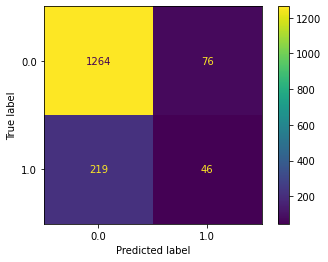

In [ ]:
plot_confusion_matrix(classifier_RF, X_test, y_test)